##Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create cirlces
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
#Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

#Introduction to neural network classification with TensorFlow

In this notebook we are going to learn to write neural networkfor classification problem

A classification is where you tru to classify something as one thing or another
A few types of classification problems :
  * Binary classification
  * Multiclass clasification
  * Multilabel classification

In [ ]:
#Check the features
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

Our data is little hard to understand right nowo.. lets visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


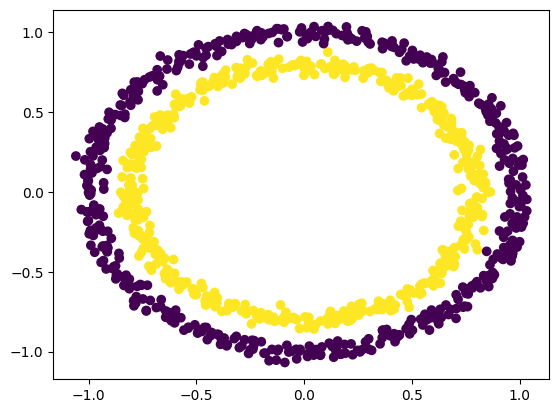

In [ ]:
#Viusalize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y);

In [ ]:
 #Our shapes of x and y

 X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
#View the first example of X and y
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in modeling

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

#1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 0.9060 - accuracy: 0.5004
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.5008
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4993
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4988
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4963


In [ ]:
#Try improve training for longer
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

#Since we are working on a binary classification problem and our model is getting around 50% accuracy its performing like its guesing
#lets get the extra layer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(tf.expand_dims(X,axis=-1),y,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013


[0.6932265162467957, 0.5012500286102295]

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_3.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 2.9196 - accuracy: 0.4985
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7902 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7222 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5051
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4921
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6938425898551941, 0.5]

To visualize our models predicitons lets create a function 'plot_decision_boundary()'

tHIS FUNCITON will:
* Take in a trained model,features(X) and labels(y)
* Cretae meshgrid of the different X values
* Make predicitoins across the meshgrid
* Plot the predicitions as well as a line between zones

In [ ]:
import numpy as np

In [ ]:

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


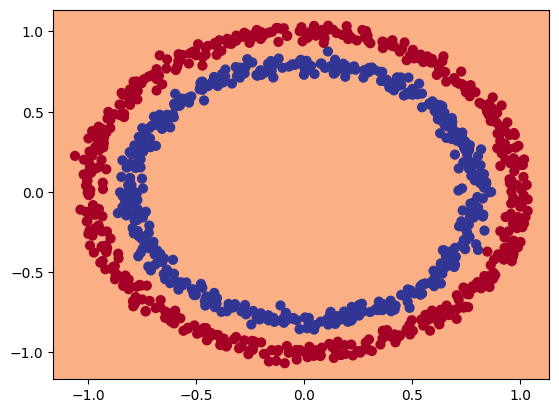

In [ ]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

X_regression,y_regression


(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
#Split our regression data to training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: -5467.2144 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: -7148.4985 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 406.7070 - mae: 406.7070
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 278.6846 - mae: 278.6846
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 153.0782 - mae: 153.0782
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 51.4795 - mae: 51.4795
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 88.1010 - mae: 88.1010
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 83.1845 - mae: 83.1845
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 47.6180 - mae: 47.6180
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 57.3136 - mae: 57.3136
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.9438 - mae: 48.9438
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 48.2332 - mae: 48.2332
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


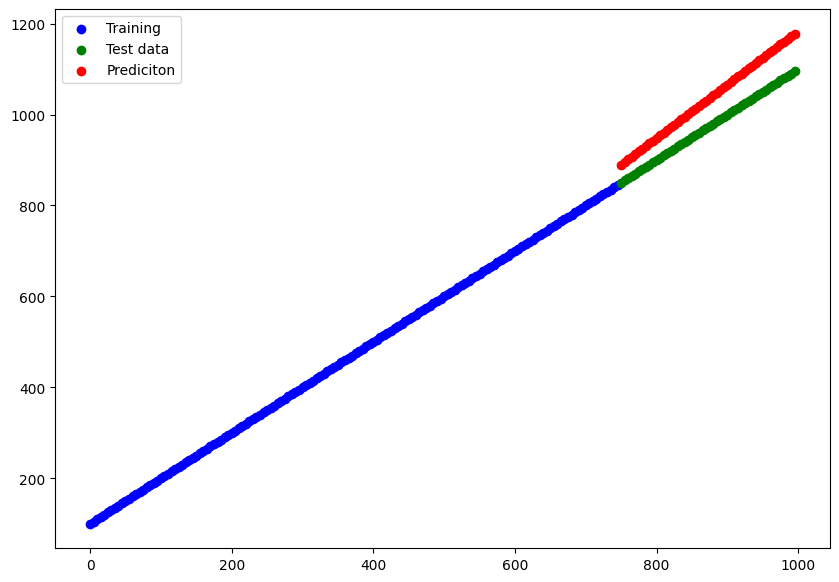

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Prediciton")
plt.legend();


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(tf.expand_dims(X, axis=-1),y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3108 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0101 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7286 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.5813 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4185 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2192 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9870 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4958 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3586 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0447 - accuracy: 0.5000
Epoch 11/

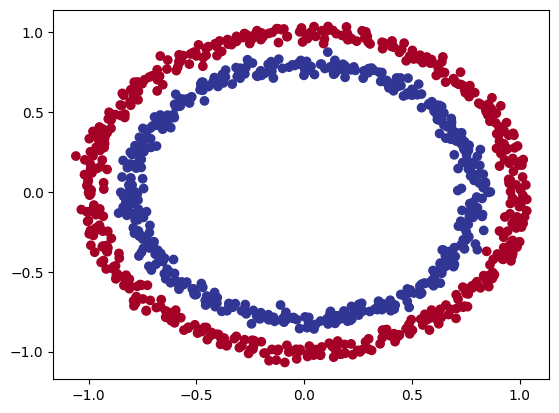

In [ ]:
 #Check the data (VISUALIZE)
 plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


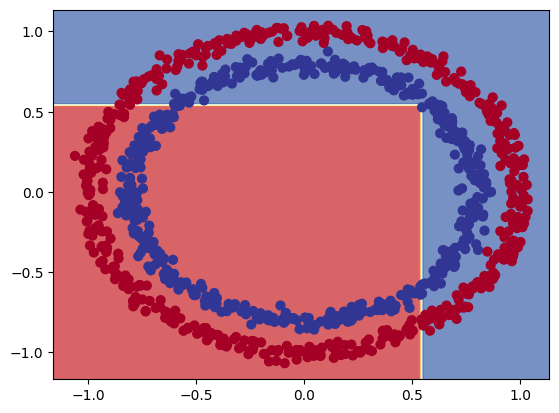

In [ ]:
#Check the decision boundary for latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Building a neural network with a non linear activation

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history = model_5.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3161 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6958 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3147 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3241 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2745 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2444 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2188 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1944 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1733 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1530 - accuracy: 0.5000
Epoch 11/

In [ ]:
#Time to replicate multi layer neural network from TensroFlow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


history = model_6.fit(X,y,epochs=250)


Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 6.1898 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 4.8621 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 2.6883 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 1.3893 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 1.2794 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 1.2076 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 1.1486 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0504 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0077 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


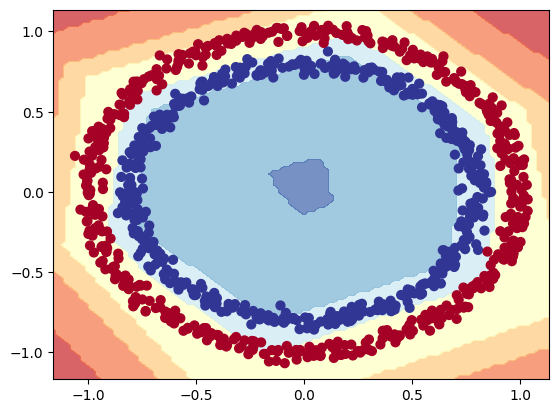

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
#Set the random seed
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.5540
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5130
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5120
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5130
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5150
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5200
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5230
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5150
Epoch 11/

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.6820


[0.5732731819152832, 0.6819999814033508]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


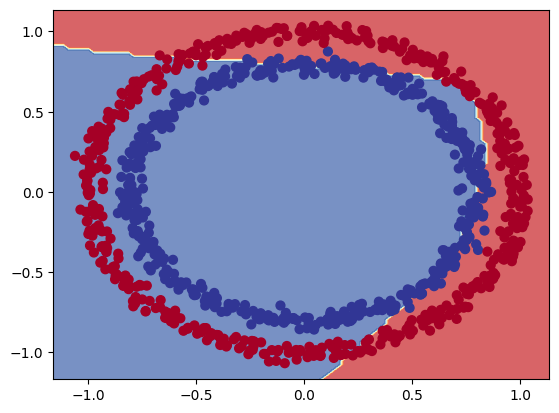

In [ ]:
#Lets visualize our incredible metrics
plot_decision_boundary(model_7,X,y)

**NOTE** : The combination of linear and non linear function is one of the key fundamentals of neural network



In [ ]:
#cREATE A TOY tensor (sismilat to the data we paas into our model)

A=tf.cast(tf.range(-10,10),tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

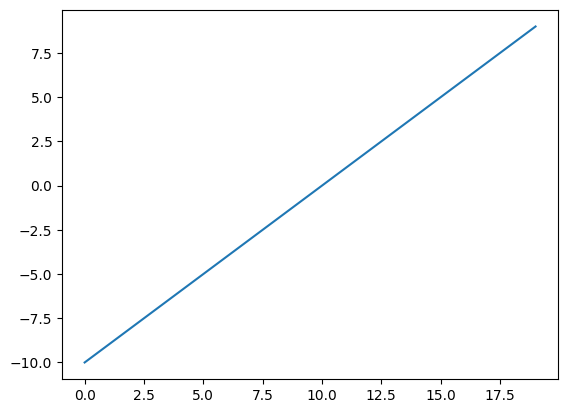

In [ ]:
#Visualize our toy tensor
plt.plot(A)

In [ ]:
#Lets start by replicating sigmoid - sigmoid(x)=1/(1+exp(-x))

def sigmoid(x):
  return 1/(1+tf.exp(-x))

#Use the sigmoid on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

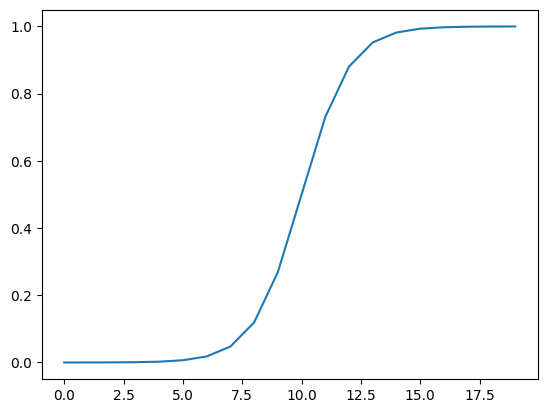

In [ ]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

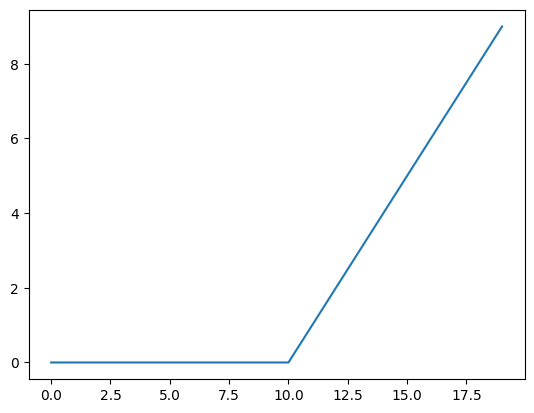

In [ ]:
#Plot relu
plt.plot(relu(A))

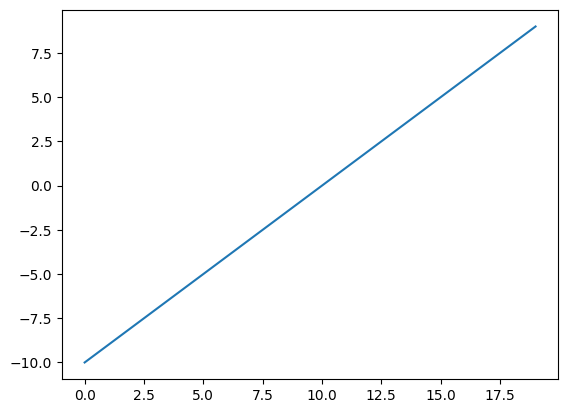

In [ ]:
plt.plot(A)

In [ ]:
#Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

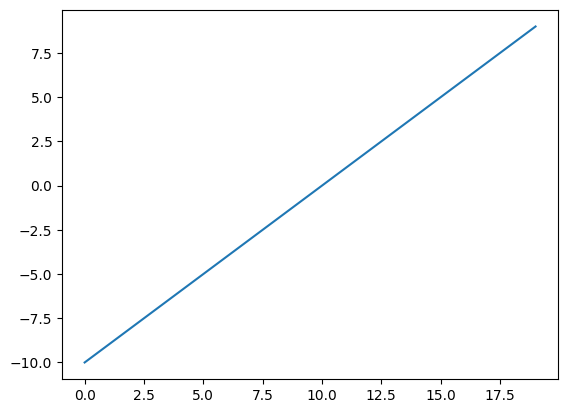

In [ ]:
#Does the linear activatoin function change anything
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However in ML this is basically a sin

So lets create a training and test set

In [ ]:
len(X)

1000

In [ ]:
# Split into train and test sets
X_train,y_train = X[:800],y[:800]

X_test,y_test = X[800:],y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Let's recreate a model to fit on the trianing data and evaluate on test data

# Set seed
tf.random.set_seed(42)

#1. Create the model(same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the model

history = model_8.fit(X_train,y_train,epochs=25)

NameError: ignored

In [ ]:
#4. Evaluate the model on test data set
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8300


[0.386035680770874, 0.8299999833106995]

313/313 [==============================] - 0s 902us/step
doing binary classifcation...
313/313 [==============================] - 0s 901us/step
doing binary classifcation...


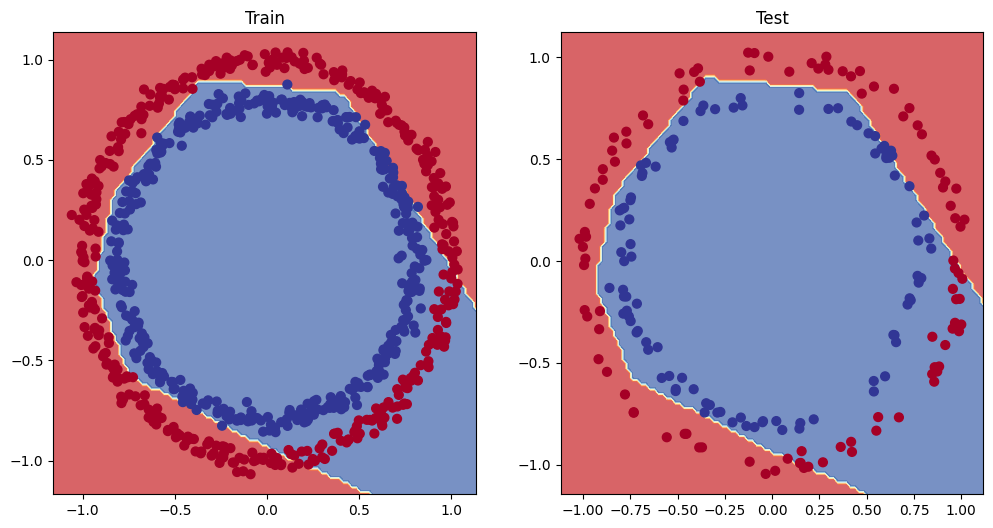

In [ ]:
#Plot the decision boundries for training and test data sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();


In [ ]:
history.history

{'loss': [0.7017022967338562,
  0.6849472522735596,
  0.6778411269187927,
  0.671772301197052,
  0.6654520630836487,
  0.6570676565170288,
  0.6460714936256409,
  0.6336461901664734,
  0.6154509782791138,
  0.5827630758285522,
  0.5519434213638306,
  0.5143107771873474,
  0.4880184829235077,
  0.4624427855014801,
  0.44349780678749084,
  0.42184996604919434,
  0.4066864848136902,
  0.3982912003993988,
  0.39019694924354553,
  0.39616405963897705,
  0.374454528093338,
  0.363042950630188,
  0.3526488244533539,
  0.35312044620513916,
  0.3408414423465729],
 'accuracy': [0.47874999046325684,
  0.5237500071525574,
  0.5699999928474426,
  0.574999988079071,
  0.6087499856948853,
  0.5837500095367432,
  0.6225000023841858,
  0.643750011920929,
  0.7099999785423279,
  0.7112500071525574,
  0.7475000023841858,
  0.7987499833106995,
  0.7875000238418579,
  0.8287500143051147,
  0.8262500166893005,
  0.84375,
  0.8512499928474426,
  0.8587499856948853,
  0.8612499833106995,
  0.831250011920929,


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.701702,0.47875
1,0.684947,0.52375
2,0.677841,0.57000
3,0.671772,0.57500
4,0.665452,0.60875
5,0.657068,0.58375
6,0.646071,0.62250
7,0.633646,0.64375
8,0.615451,0.71000
9,0.582763,0.71125


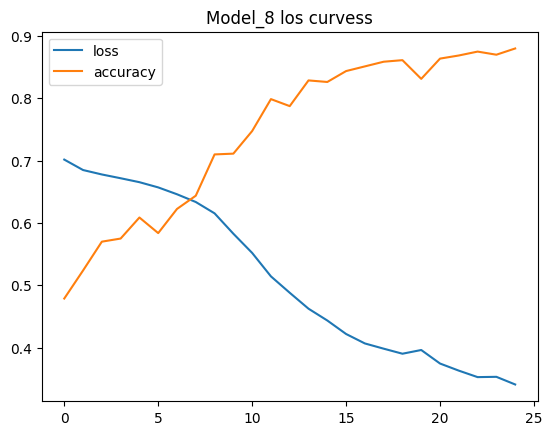

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 los curvess");

## Finding the best learning rate

To find the ideal learning rate(the learning rate where the loss decreases the modest during training)we are going to use this steps:

* A learning rate **callback** -you can think about callback as an extra piece of functoinallity you can add to your model while its training.


* Another model(we can use the same as above but we are practicing building model here)

* A modeifed loss curves plot

In [ ]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

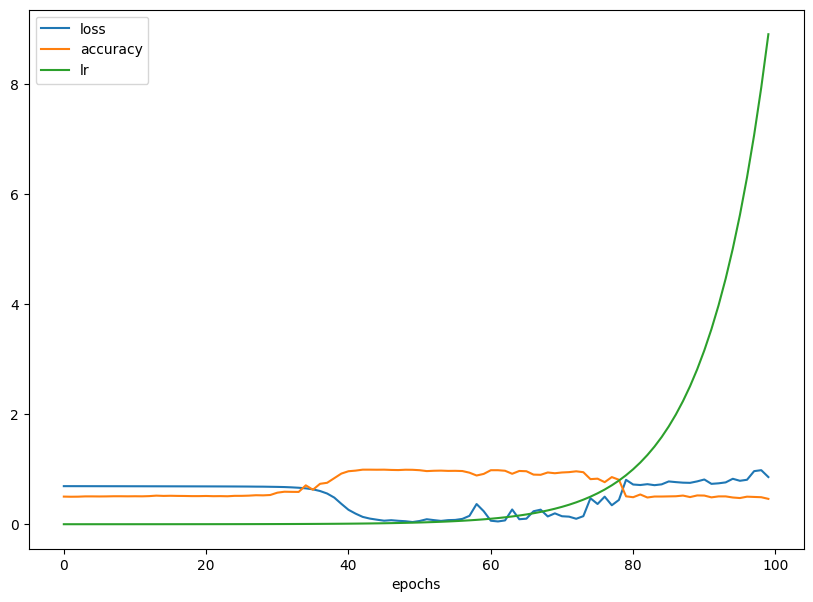

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

Text(0, 0.5, 'Loss')

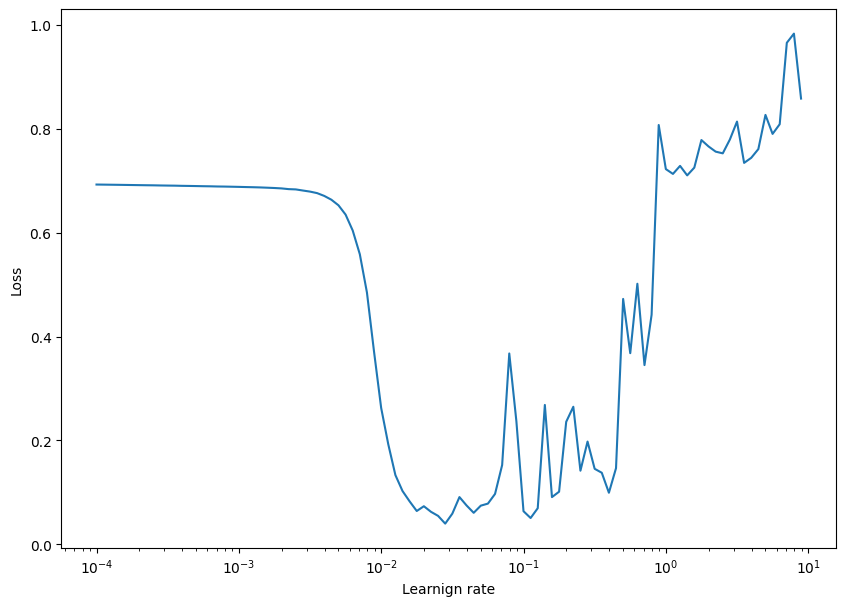

In [ ]:
#Plot the LR vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learnign rate")
plt.ylabel("Loss")

In [ ]:
 10**-2


0.01

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.7016 - accuracy: 0.4950
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5263
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.6100
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6538
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7013
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.7125
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.7462
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.7788
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8125
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8350
Epoch 11/20
25/25 [

In [ ]:
#Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9600


[0.14792107045650482, 0.9599999785423279]

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8300


[0.386035680770874, 0.8299999833106995]

313/313 [==============================] - 0s 890us/step
doing binary classifcation...
313/313 [==============================] - 0s 912us/step
doing binary classifcation...


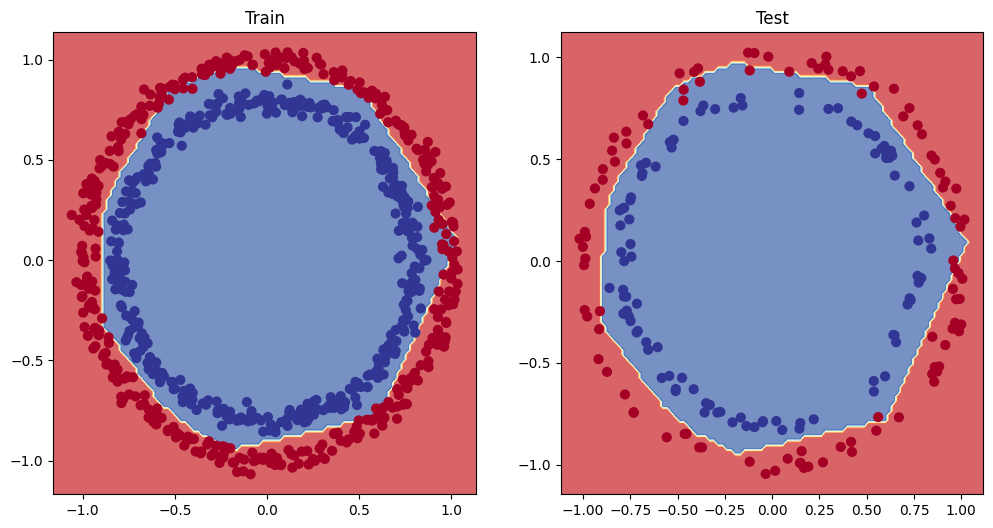

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our models results as much as possible there are handfull of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* COnfusion matrix
* Classification report(from scikit learn)

In [ ]:
# Check the accuracy of our model
loss,accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.1479 - accuracy: 0.9600
Model loss on test set: 0.14792107045650482
Model accuracy on test set: 96.00%


How about a confusion Matrix

In [ ]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make some predicitons
y_preds = model_10.predict(X_test)

#Creaete confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 1ms/step


ValueError: ignored

In [ ]:
y_test[:10],y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.969143  ],
        [0.9955282 ],
        [0.9960359 ],
        [0.8970211 ],
        [0.8301561 ],
        [0.14275937],
        [0.97488135],
        [0.19320424],
        [0.9955222 ],
        [0.09006837]], dtype=float32))

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called prediction probabilities.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().

In [ ]:
# Convert our prediciton probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#Create confusion matrix again
confusion_matrix(y_test,tf.round(y_preds))

array([[93,  8],
       [ 0, 99]])

How about we prettify our confusion matrix?

#Note: the confusion matrix code we are about to write is a remix of scikit confusion plot matrix funstion

In [ ]:
import itertools
def plot_confusion_matrix():
  figsize=(10,10)

  #Create the confusion matrix
  cm=confusion_matrix(y_test,tf.round(y_preds))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  #Lets preetify it
  fig,ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  classes=False

  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion matrix",
        xlabel="predicted",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  #Set tresh hold for different colors
  treshold = (cm.max()+cm.min())/2

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>treshold else "black",
            size=15)


POKUSAVANJE PRAVLJENJA FUNKCIJE PLOT_CONFUSION_MATRIX

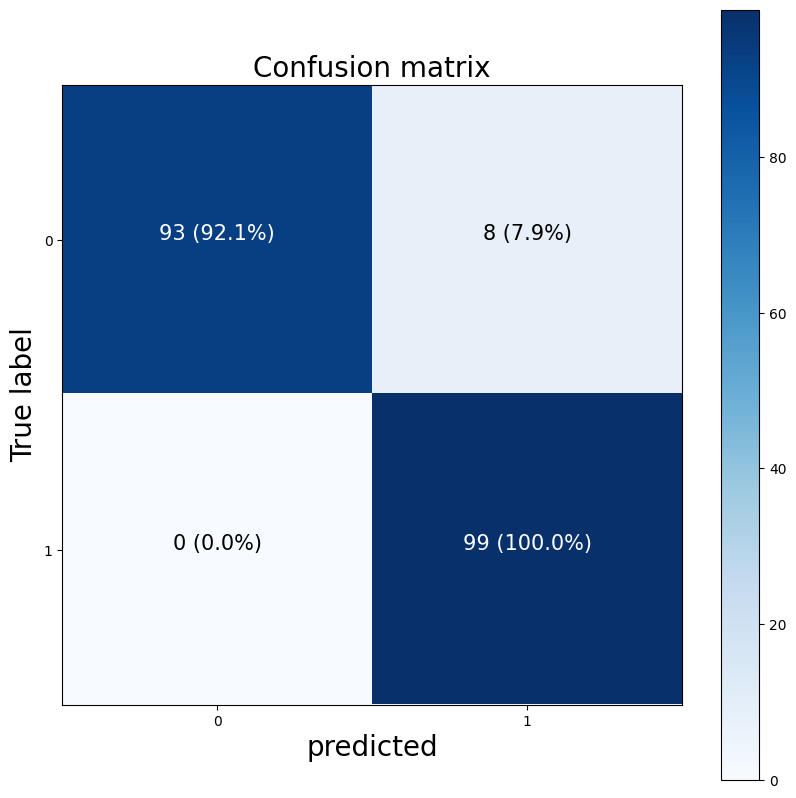

In [ ]:
plot_confusion_matrix()

##Working with larger data(Multiclass classification)

When you have more than 2 classes as option, its known as **multi-class classification**

* This means if you have 3 different classes its multiclass classifications

* It also mean if you have 100 different classes its mutliclass calssification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is alredy be sorted into training and test sets for us)
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Show the first training example
print(f"Training sample: {train_data[0]}\n")
print(f"Training label: {train_labels[0]}\n")

Training sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Ckech the shape
train_data[0].shape,train_labels[0].shape

((28, 28), ())

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[]);

SyntaxError: ignored

In [ ]:
train_labels[7]

2

In [ ]:
#Create a small list so we can index onto our training labels so they are human readable
class_name=["Tshirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_name)

10

In [ ]:
index_of_choise = 13
plt.imshow(train_data[index_of_choise],cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choise]])

NameError: ignored

In [ ]:
#Plot multiple random images of Fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

NameError: ignored

##Building a mutli-class classification model

For our multi-class classification model,we can use a similar architecture to our binary classifiares , howecer we are going to have to tweak a few things
* Input shape=28*28
* output shape = 10(one per class= 1*10)
* Loss functions = tf.keras.losses.CategoricalCrossentropy()
*Output layer activation = spftmax



In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 2.3994 - accuracy: 0.0984 - val_loss: 2.3021 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2830 - accuracy: 0.1072 - val_loss: 2.2606 - val_accuracy: 0.1189
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0649 - accuracy: 0.1774 - val_loss: 1.8220 - val_accuracy: 0.2307
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7521 - accuracy: 0.2482 - val_loss: 1.7038 - val_accuracy: 0.2721
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6936 - accuracy: 0.2672 - val_loss: 1.6886 - val_accuracy: 0.2576
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6638 - accuracy: 0.2837 - val_loss: 1.6622 - val_accuracy: 0.2852
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6455 - accuracy: 0.2929 - val_loss: 1.6422 - val_accuracy

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural networks prefer data to be scaled(or normalized),this means they like to have numbers into tensors between 0 and 1

In [ ]:
#We can get our training and testing data between 0 adn 1 by dividing by the maximum
train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0

In [ ]:
#Check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized , let's build a model to find patterns in it

#Set random seed

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2407 - accuracy: 0.5227 - val_loss: 0.8637 - val_accuracy: 0.6602
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8177 - accuracy: 0.6787 - val_loss: 0.8180 - val_accuracy: 0.6816
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7753 - accuracy: 0.6989 - val_loss: 0.7760 - val_accuracy: 0.6952
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7525 - accuracy: 0.7156 - val_loss: 0.7654 - val_accuracy: 0.6989
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7364 - accuracy: 0.7245 - val_loss: 0.7435 - val_accuracy: 0.7255
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7259 - accuracy: 0.7282 - val_loss: 0.7559 - val_accuracy: 0.7238
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7170 - accuracy: 0.7339 - val_loss: 0.7476 - val_accuracy:

**KEY NOTE** neural networks tend to prefer data in numerical form as well as scaled/normalazied(0 and 1)

<Axes: title={'center': 'Normalized data'}>

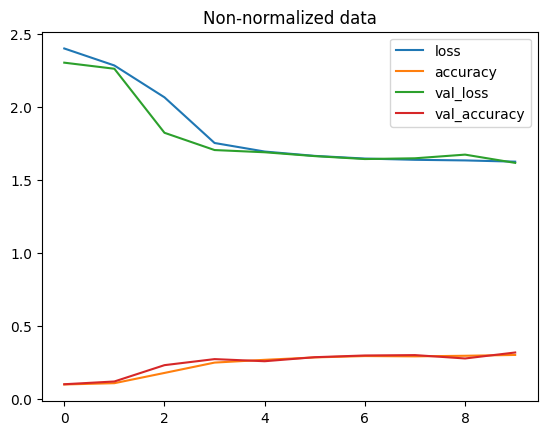

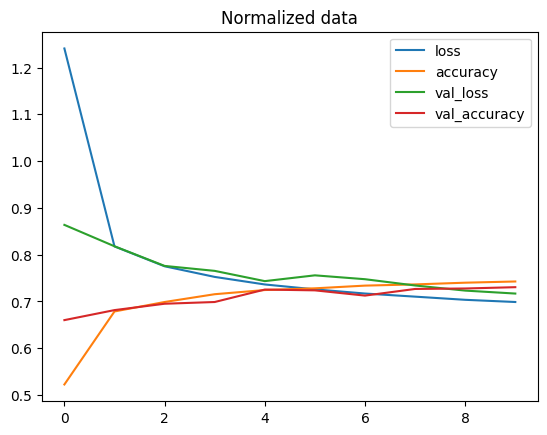

In [ ]:
import pandas as pd
# Plot non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#Plot normilized data
pd.DataFrame(norm_history.history).plot(title="Normalized data")

Wow. From these two plots, we can see how much quicker our model with the normalized data (model_12) improved than the model with the non-normalized data (model_11).

🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

###Finding the ideal learning rate


In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")

])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#Create the leraning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_history = model_13.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm,test_labels),
                          callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0876 - accuracy: 0.6062 - val_loss: 0.8279 - val_accuracy: 0.6937 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7762 - accuracy: 0.7290 - val_loss: 0.7700 - val_accuracy: 0.7235 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7064 - accuracy: 0.7557 - val_loss: 0.6890 - val_accuracy: 0.7618 - lr: 0.0013
Epoch 4/40
1787/1875 [===========================>..] - ETA: 0s - loss: 0.6597 - accuracy: 0.7696

KeyboardInterrupt: ignored

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

NameError: ignored

In [ ]:
#Lets refit the model with ideal learning rate
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")

])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])


history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2279 - accuracy: 0.5679 - val_loss: 0.8635 - val_accuracy: 0.6912
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7855 - accuracy: 0.7203 - val_loss: 0.7509 - val_accuracy: 0.7403
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6986 - accuracy: 0.7558 - val_loss: 0.6971 - val_accuracy: 0.7526
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6570 - accuracy: 0.7692 - val_loss: 0.6735 - val_accuracy: 0.7645
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6380 - accuracy: 0.7761 - val_loss: 0.6732 - val_accuracy: 0.7653
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6222 - accuracy: 0.7815 - val_loss: 0.6535 - val_accuracy: 0.7762
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6126 - accuracy: 0.7848 - val_loss: 0.6476 - val_accuracy:

##Evaluating multiclass classification model

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.
Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [ ]:
#Make some predicitons
y_probs=model_14.predict(test_data_norm)#probs is short for prediciont probabilies

#View the first 5
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[9.85696334e-13, 7.24817233e-25, 1.70551022e-08, 2.97961690e-11,
        7.44142335e-12, 3.03827792e-01, 2.93433810e-12, 5.16670570e-02,
        2.68524489e-03, 6.41819894e-01],
       [4.70998057e-05, 1.03972168e-20, 8.87696385e-01, 2.64518803e-07,
        2.82738358e-02, 8.12733208e-17, 4.43806499e-02, 1.04319928e-25,
        3.96018066e-02, 3.13371636e-37],
       [1.89300496e-02, 9.57753003e-01, 3.89366120e-04, 1.96852461e-02,
        2.16870787e-04, 2.28024612e-04, 2.76985322e-03, 8.33375111e-07,
        2.68428812e-05, 7.05926517e-09],
       [1.89300496e-02, 9.57753003e-01, 3.89366120e-04, 1.96852461e-02,
        2.16870787e-04, 2.28024612e-04, 2.76985322e-03, 8.33375111e-07,
        2.68428812e-05, 7.05926517e-09],
       [2.87302852e-01, 2.13475378e-05, 2.36169010e-01, 1.23950755e-02,
        2.91185696e-02, 1.89126615e-06, 4.22907501e-01, 1.36877593e-11,
        1.20836375e-02, 3.70061627e-16]], dtype=float32)

In [ ]:
y_probs[0],tf.argmax(y_probs[0])

(array([9.8569633e-13, 7.2481723e-25, 1.7055102e-08, 2.9796169e-11,
        7.4414233e-12, 3.0382779e-01, 2.9343381e-12, 5.1667057e-02,
        2.6852449e-03, 6.4181989e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#View the first 10 prediciton
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels==y_preds


array([ True,  True,  True, ..., False,  True,  True])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[746,  14,  23,  76,   3,   8, 116,   0,  14,   0],
       [  7, 932,   2,  48,   1,   2,   7,   0,   1,   0],
       [ 32,   1, 650,  35, 142,   0, 102,   0,  38,   0],
       [ 18,  26,  17, 845,  36,   9,  38,   1,  10,   0],
       [  3,   0, 126,  68, 698,   0,  97,   0,   8,   0],
       [  0,   0,   0,   1,   0, 888,   0,  55,  14,  42],
       [164,   3, 165,  70, 130,   5, 434,   0,  29,   0],
       [  0,   0,   0,   0,   0,  30,   0, 927,   0,  43],
       [  7,   1,  30,  13,   4,  11,   4,   7, 923,   0],
       [  0,   0,   0,   0,   0,  36,   0,  43,   1, 920]])

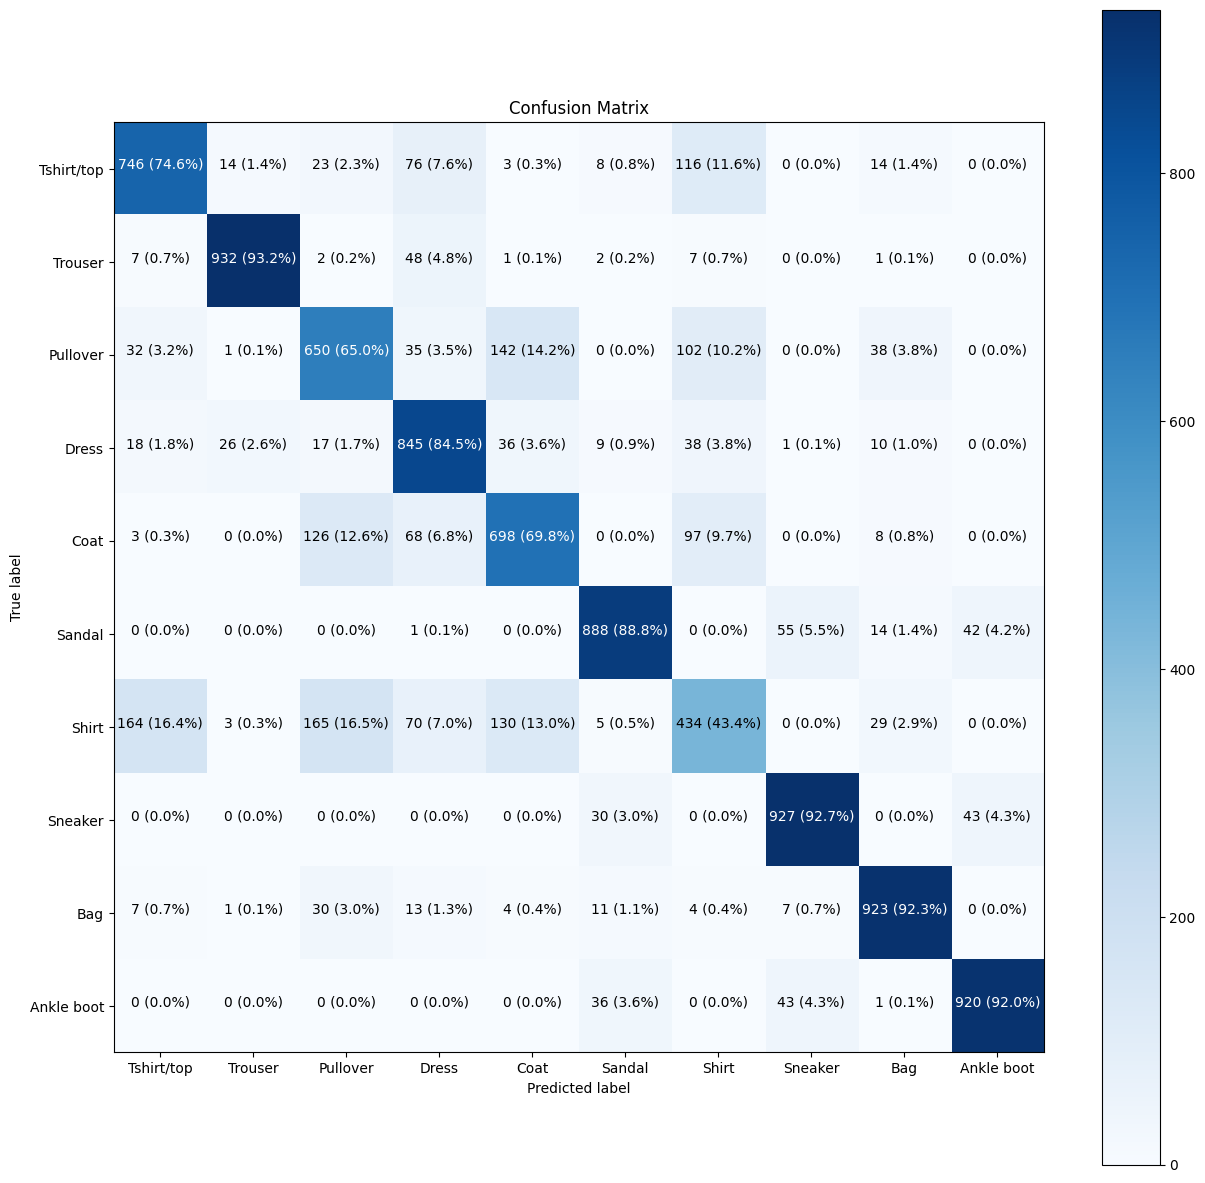

In [ ]:
#Lets make a preittier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_name,
                      figsize=(15,15),
                      text_size=10)

In [ ]:
import random

def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image plots it and labels it with a prediciton and truth label
  """
  i = random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]


  plt.imshow(target_image,cmap=plt.cm.binary)

  #Changethe color of titles dependig on if prediciton correct or not
  if pred_label == true_label:
    color= "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
            color = color)


1/1 [==============================] - 0s 21ms/step


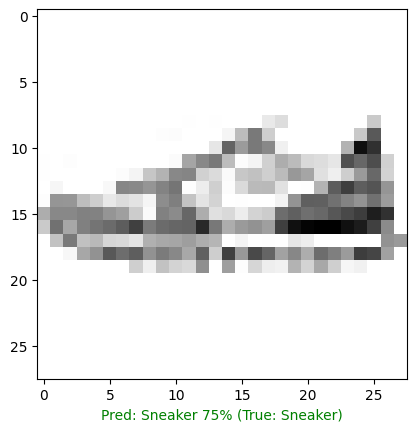

In [ ]:
#Check out a random image as well as its predicition
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_name)

In [ ]:
model_14.layers

In [ ]:
model_14.layers[1]

In [ ]:
weights, biases = model_14.layers[1].get_weights()

weights,weights.shape

(array([[ 0.06468514, -0.9167568 , -0.22969744,  0.2608673 ],
        [ 0.90528095,  0.10200216, -0.6006023 , -0.2728801 ],
        [ 0.80916315, -0.78322136, -0.60673034,  0.9588038 ],
        ...,
        [-0.26876116,  0.06725787,  0.21420611, -0.50745595],
        [ 0.11755383, -0.5000241 ,  0.2417568 , -0.5835403 ],
        [ 0.05748327, -0.0636024 , -0.22953251, -0.09973007]],
       dtype=float32),
 (784, 4))

In [ ]:
biases,biases.shape

(array([0.37141028, 2.2011006 , 1.2997588 , 1.9488181 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

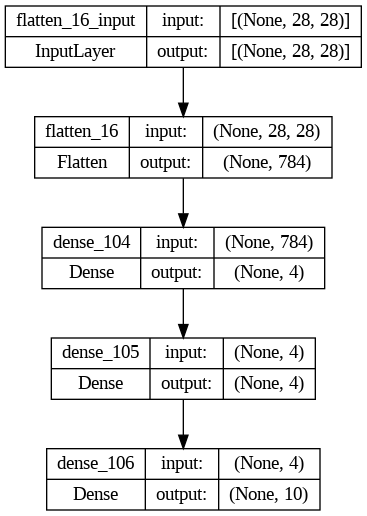

In [ ]:
# Lets view another way of viewing the deep learnign  models
from tensorflow.keras.utils import plot_model

#See the inputs and outputs
plot_model(model_14,show_shapes=True)

In [ ]:
!nvidia -smi
